<a href="https://colab.research.google.com/github/5harad/API-201-2023/blob/main/lecture/grammar-graphics-answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **API-201: The grammar of graphics**

In this class session, we'll see how we can accomplish sophisticated data visualization using the *grammar of graphics*. In the process, we'll recreate many of the plots that saw in our last class.

But a word of caution: there is a conceptual elegance to how visualization works in `tidyverse`, but the details can get messy. It is possible to create almost any plot you'd like, but it's not necessarily straightforward. Trial and error (and Google!) is your friend!

**Getting started**

Before you start, create a copy of this Jupyter notebook in your own Google Drive by clicking `Copy to Drive` in the menubar. If you do not do this your work will not be saved!

We recommend completing this problem set in Google Chrome.

We begin by loading the various libraries that we'll use.

In [1]:
library(tidyverse)
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




## Part 1: Intergenerational mobility

This illustration is inspired by: https://www.youtube.com/watch?v=fSgEeI2Xpdc. Original data is from the paper Alesina, A, S Hohmann, S Michalopoulos and E Papaioannou (2019a), “Intergenerational mobility in Africa”, CEPR Discussion Paper 13497.

Run the cell below to load the data.

In [2]:
# We start by loading the data
# from https://onlinelibrary.wiley.com/doi/epdf/10.3982/ECTA17018
mobility <-
    tribble(
        ~country, ~avg, ~districts, ~median,   ~sd,  ~min,  ~max,
        "South Africa",  0.79,        216,     0.8, 0.075, 0.555, 0.896,
        "Botswana",   0.7,         23,   0.714, 0.079, 0.554, 0.909,
        "Zimbabwe",  0.63,         88,   0.726, 0.148,   0.4,     1,
        "Nigeria",  0.64,         37,   0.765, 0.201,  0.33, 0.963,
        "Egypt",  0.65,        236,   0.694, 0.105, 0.418, 0.914,
        "Tanzania",   0.6,        113,   0.611, 0.094, 0.408, 0.854,
        "Ghana",  0.58,        110,    0.65, 0.158, 0.181,  0.82,
        "Cameroon",  0.52,        230,   0.588, 0.203, 0.088, 0.896,
        "Kenya",  0.45,        173,   0.514, 0.187, 0.048, 0.873,
        "Zambia",  0.49,         72,   0.467, 0.127, 0.284, 0.785,
        "Morocco",  0.43,         59,   0.424, 0.145,  0.16, 0.723,
        "Lesotho",  0.44,         10,   0.437,  0.06, 0.317, 0.492,
        "Uganda",  0.37,        161,   0.382, 0.128, 0.015, 0.696,
        "Benin",  0.41,         77,   0.381, 0.132, 0.111, 0.649,
        "Rwanda",  0.29,         30,    0.28, 0.063,  0.22, 0.469,
        "Senegal",  0.29,         34,   0.209, 0.164, 0.078, 0.616,
        "Sierra Leone",  0.26,        107,   0.185, 0.149, 0.032, 0.694,
        "Ethiopia",  0.13,         97,   0.119, 0.235,     0, 0.865,
        "Malawi",  0.16,        227,   0.163, 0.115, 0.052, 0.643,
        "Liberia",  0.22,         47,    0.18,  0.08, 0.034, 0.345,
        "Guinea",  0.23,         34,   0.179, 0.085, 0.063, 0.491,
        "Sudan",  0.11,        129,   0.097, 0.144, 0.001, 0.551,
        "Mali",  0.21,        242,   0.128, 0.096, 0.013, 0.578,
        "Burkina Faso",  0.17,         45,   0.123,  0.08, 0.029, 0.526,
        "Mozambique",   0.1,        144,   0.064, 0.086, 0.015, 0.707,
        "South Sudan",  0.04,         72,   0.024, 0.056,     0, 0.319
    )

We'll start by making a simple dot plot showing intergenerational mobility by country.

Notice that we use `aes` to specify how to map the data to plotting parameters.

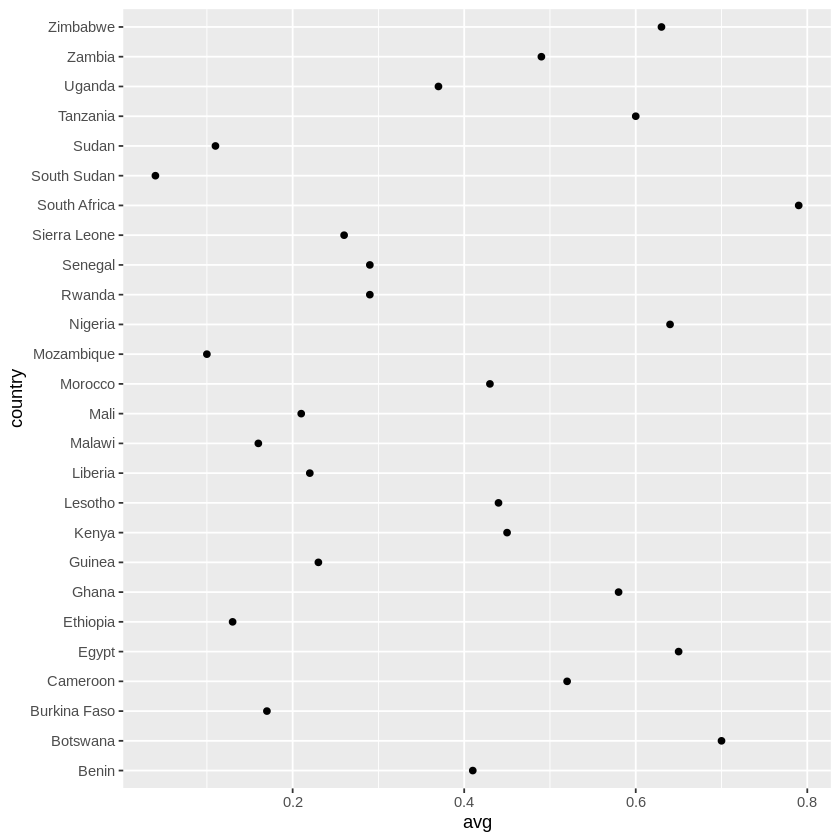

In [3]:
ggplot(mobility, aes(x = avg, y = country)) +
  geom_point()

### Exercise

To create a bar plot instead of a dot plot, replace `geom_point` with `geom_col`.



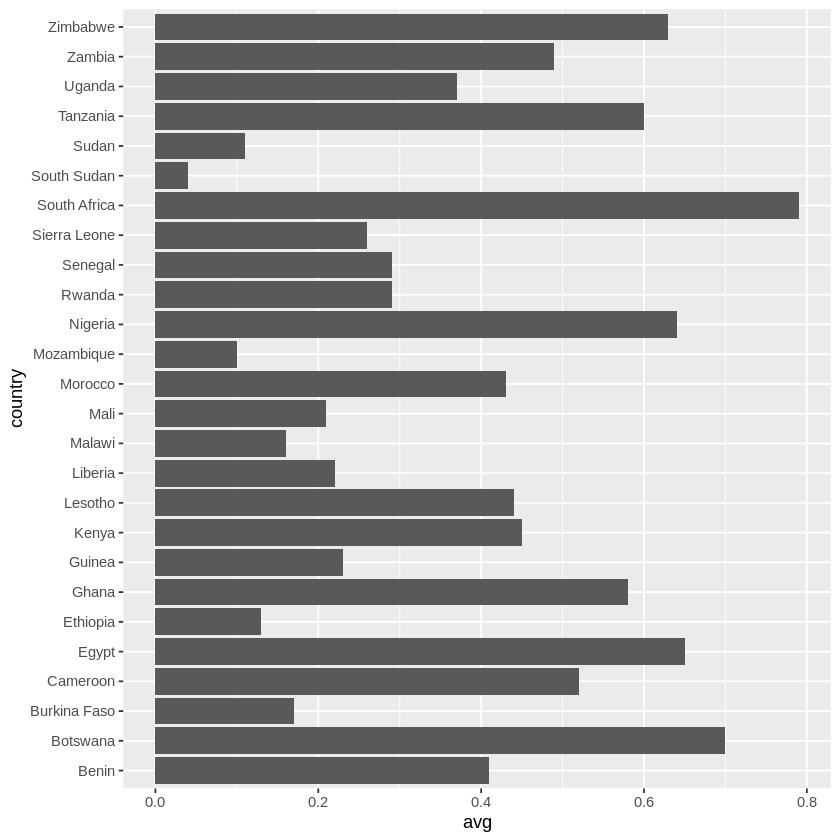

In [4]:
# Your answer here!

# START solution
ggplot(mobility, aes(x = avg, y = country)) +
  geom_col()
# END solution

### Exercise

By default, categorical data (e.g., country names) are ordered alphabetically. We can recorder data with `fct_reorder`:
> fct_reorder(vector, val)
specifies that the levels of `vector` are sorted in increasing order of `val`.

Modify the plot above so that countries are appropriately ordered.

Hint: replace `y = country` with `y = fct_reorder(...)`, selecting the right parameters for `fct_reorder`.

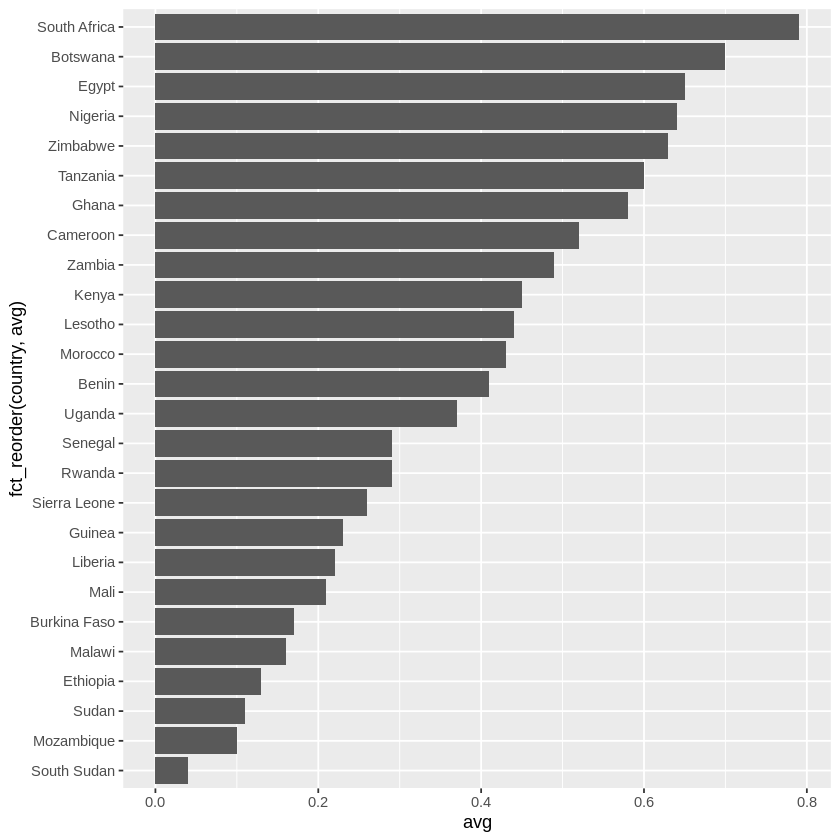

In [5]:
# Your answer here!

# START solution
ggplot(mobility, aes(x = avg, y = fct_reorder(country, avg))) +
  geom_col()
# END solution

### Exercise

We can additionally color the bars such that their color indicates intergenerational mobility. (Though that's not necessarily a good idea!)

To do so, we add `fill = variable` to the aesthetic mapping, where `variable` is the name of the variable that `fill` (i.e., the color of the bars) should correspond to. Modify your code above to make this change.

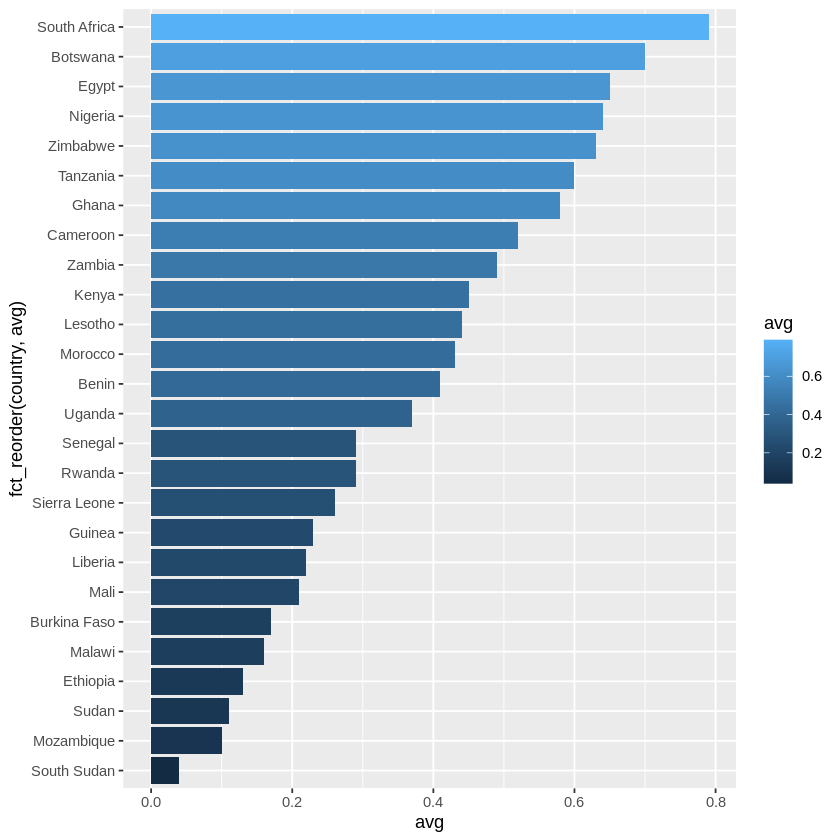

In [6]:
# Your answer here!

# START solution
ggplot(mobility, aes(x = avg, y = fct_reorder(country, avg), fill=avg)) +
  geom_col()
# END solution

By default, the axes (and legend) take their names from the variables in the data frame. We can change the default names with the family of `scale` commands -- the scale commands also let us change other aspects of the "scales", like their range, but we'll focus on their names now.

There are a variety of scale commands, like
- `scale_x_continuous`
- `scale_y_continuous`
- `scale_fill_continuous`
- `scale_x_discrete`
- `scale_y_discrete`
- `scale_fill_discrete`

The first part of the name (e.g., `x`, `y`, and `fill`) reference the dimension of the data that we're interested in, and the second part (e.g., `continuous` and `discrete`) specify what type of data we're talking about.

In our case, we can use `scale_x_continuous(name = 'Intergenerational mobility')` to specify that the horizontal access should be labeled "Intergenerational mobility".

### Exercise

Update the plot above so that the horizontal axis and legend are labelled "Intergenerational mobility" and the vertical axis has no name. You can set `name = NULL` to remove the name.

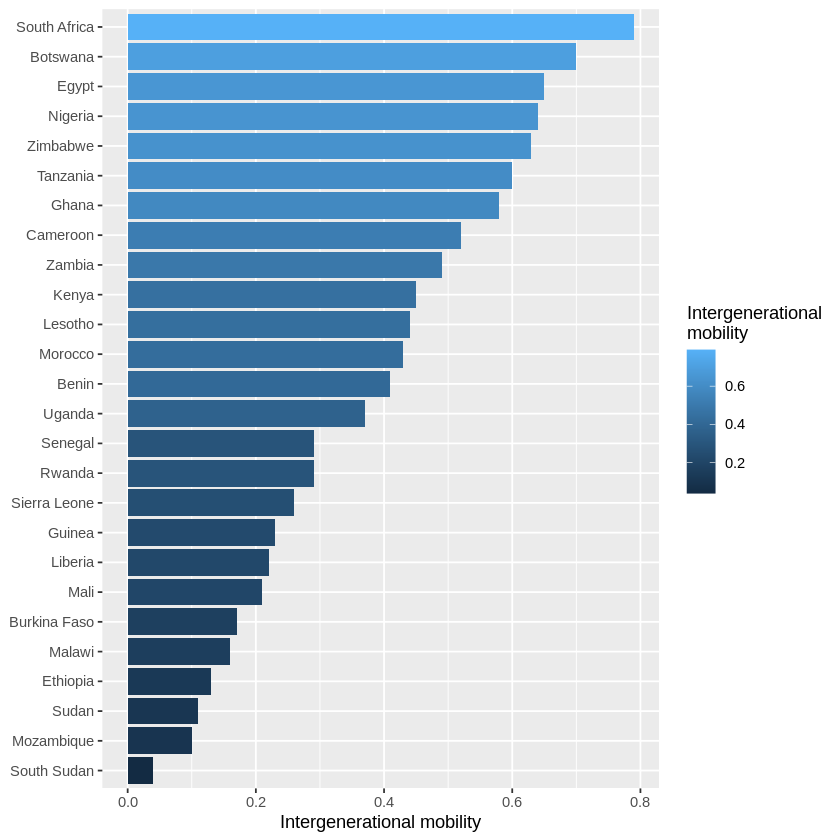

In [7]:
# Your answer here!

# START solution
ggplot(mobility, aes(x = avg, y = fct_reorder(country, avg), fill=avg)) +
  geom_col() +
  scale_x_continuous(name = 'Intergenerational mobility') +
  scale_y_discrete(name = NULL) +
  scale_fill_continuous(name = 'Intergenerational\nmobility')
# END solution

### Exercise

We can set the general appearance of a plot with the family of `theme` commands. For example, `theme_bw()` is a common choice that gives a white background. Try it yourself!

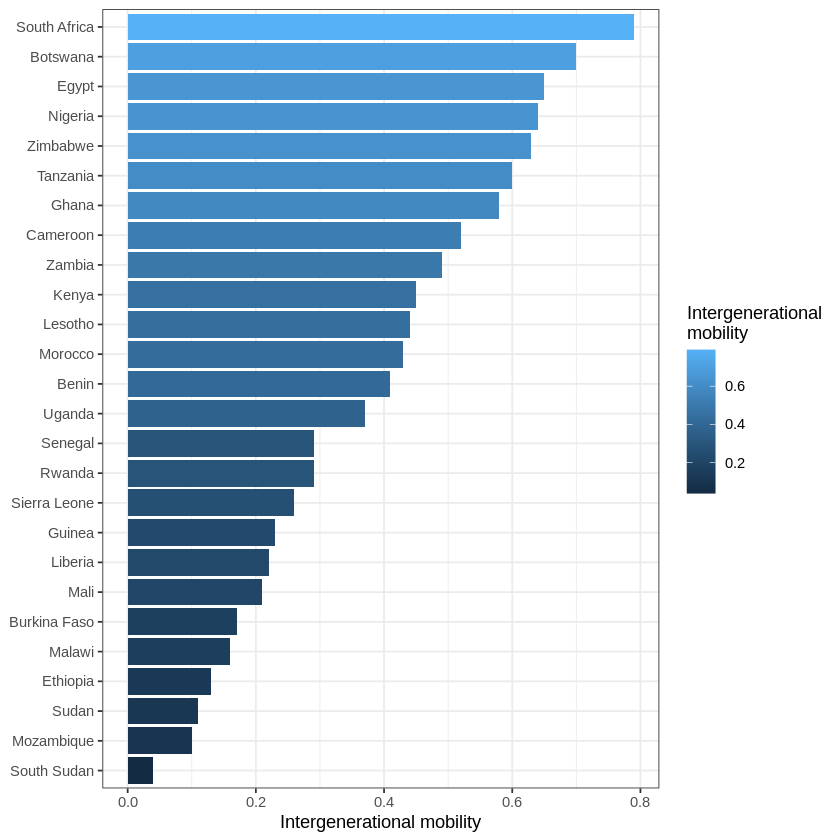

In [8]:
# Your answer here!

# START solution
ggplot(mobility, aes(x = avg, y = fct_reorder(country, avg), fill=avg)) +
  geom_col() +
  scale_x_continuous(name = 'Intergenerational mobility') +
  scale_y_discrete(name = NULL) +
  scale_fill_continuous(name = 'Intergenerational\nmobility') +
  theme_bw()
# END solution

## Part 2: Global surface temperatures

Now on to global temperatures over time. Run the cell below to get started.

In [9]:
fname <- "https://5harad.com/datasets/API201/globaltemps.csv"
globaltemps <- read_csv(url(fname))

head(globaltemps)

Rows: 137 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): Year, Anomaly, Actual Temp, Fahrenheit

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Year,Anomaly,Actual Temp,Fahrenheit
<dbl>,<dbl>,<dbl>,<dbl>
1880,-0.1148,13.7852,56.81336
1881,-0.0628,13.8372,56.90696
1882,-0.0648,13.8352,56.90336
1883,-0.1424,13.7576,56.76368
1884,-0.2009,13.6991,56.65838
1885,-0.2125,13.6875,56.63750


### Exercise

Create a dot plot of global temperatures over time. Be sure to appropriately label the axes.

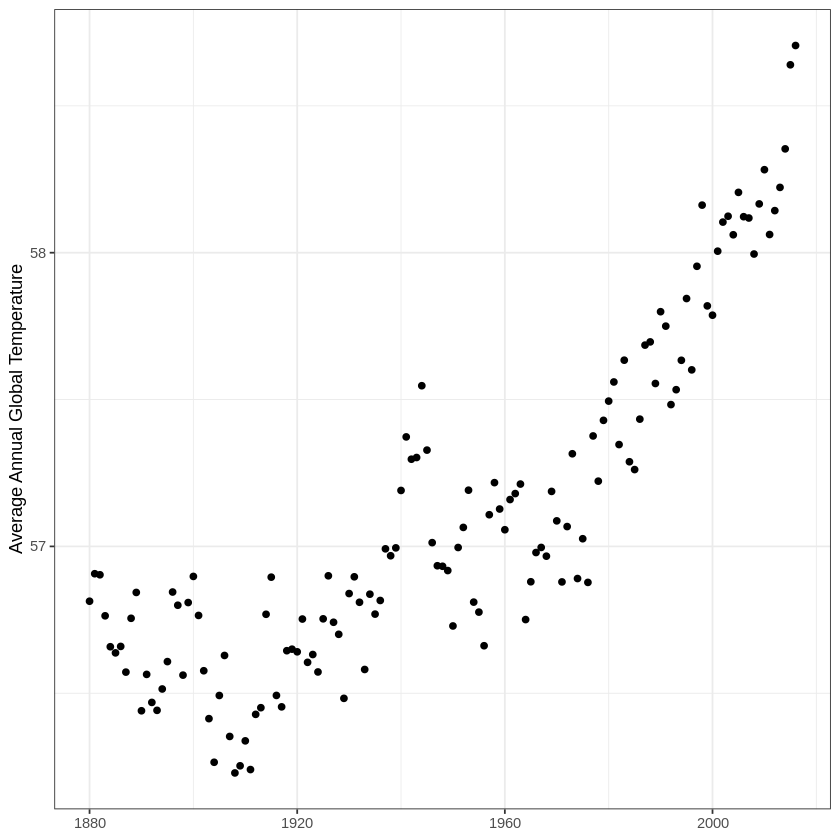

In [10]:
# Your answer here!

# START solution
ggplot(data=globaltemps, aes(x=Year, y=Fahrenheit)) +
  geom_point() +
  scale_y_continuous(name = 'Average Annual Global Temperature') +
  scale_x_continuous(name = NULL) +
  theme_bw()
# END solution

### Exercise

Connect the points in the plot above by adding `geom_line()`. (If you just want the line, and no points, you can also remove `geom_point()`.

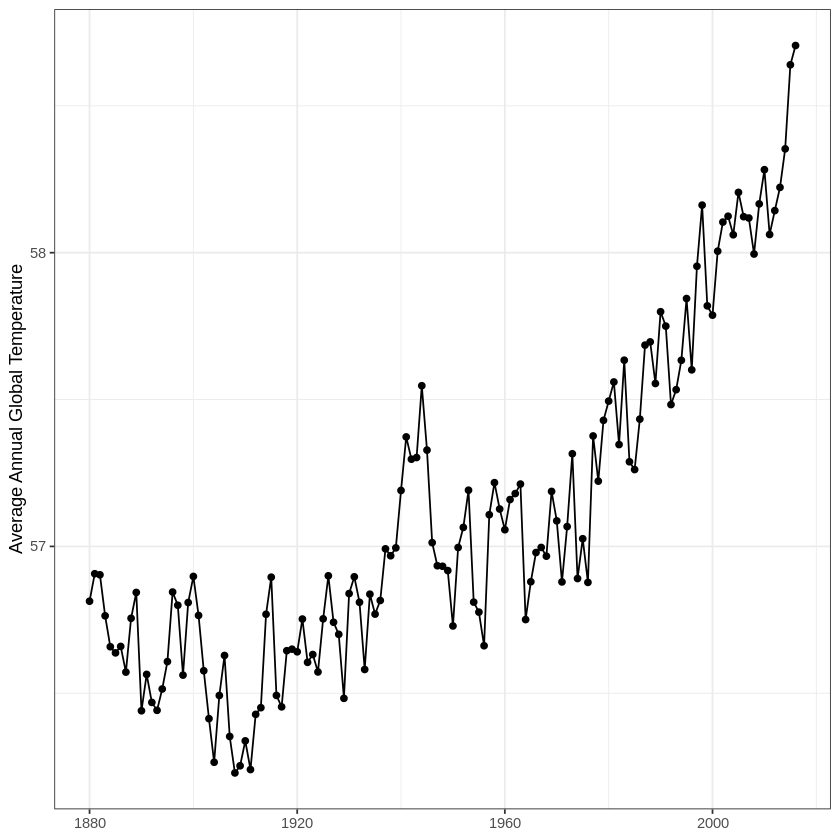

In [11]:
# Your answer here!

# START solution
ggplot(data=globaltemps, aes(x=Year, y=Fahrenheit)) +
  geom_point() +
  geom_line() +
  scale_y_continuous(name = 'Average Annual Global Temperature') +
  scale_x_continuous(name = NULL) +
  theme_bw()
# END solution

### Exercise
Now rescale the vertical axis to make it look like there was little change over time. (You shouldn't do this in practice, as it can mislead readers, like we discussed in class!)

You can do this by passing in the argument `limits = c(lower, upper)` to a `scale` command to specify the range of an axis, where `lower` and `upper` are numbers that you specify. For example, `limits = c(-5, 1)` sets the range to go from -5 to 1.

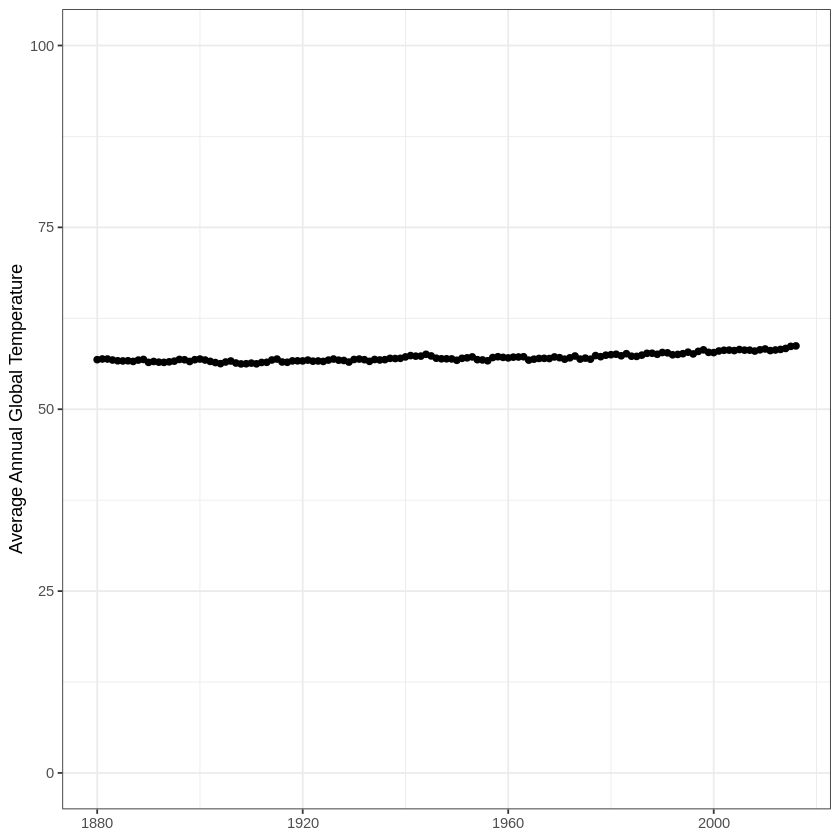

In [12]:
# Your answer here!

# START solution
ggplot(data=globaltemps, aes(x=Year, y=Fahrenheit)) +
  geom_point() +
  scale_y_continuous(name = 'Average Annual Global Temperature', limits = c(0,100)) +
  scale_x_continuous(name = NULL) +
  theme_bw()
# END solution

## Part 3: Flight delays

Next we'll create a plot of airline delays. Run the following two cells to load and parse the data.

In [13]:
# load the data
install.packages('nycflights13')
library(nycflights13)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
# prepare the data
national <- c('JetBlue', 'Southwest', 'United', 'American', 'Delta', 'US')
regional <- c('ExpressJet', 'Envoy', 'Endeavor')

flight_delays <- flights %>%
    mutate(delayed = (arr_delay > 15)) %>%
    group_by(carrier) %>%
    summarize(p_delayed = mean(delayed, na.rm=TRUE)) %>%
    left_join(airlines, by = 'carrier') %>%
    mutate(short_name = word(name, 1)) %>%
    filter(short_name %in% c(national, regional)) %>%
    mutate(carrier_type = if_else(short_name %in% national, 'National', 'Regional'))

flight_delays

carrier,p_delayed,name,short_name,carrier_type
<chr>,<dbl>,<chr>,<chr>,<chr>
9E,0.2491616,Endeavor Air Inc.,Endeavor,Regional
AA,0.1879363,American Airlines Inc.,American,National
B6,0.2610779,JetBlue Airways,JetBlue,National
DL,0.1823408,Delta Air Lines Inc.,Delta,National
EV,0.3136104,ExpressJet Airlines Inc.,ExpressJet,Regional
MQ,0.2706794,Envoy Air,Envoy,Regional
UA,0.2179225,United Air Lines Inc.,United,National
US,0.1794665,US Airways Inc.,US,National
WN,0.2485885,Southwest Airlines Co.,Southwest,National


### Exercise

Create a dot plot using the `flight_delays` data such that:
- The vertical axis lists airlines, with their delay percentages shown on the horiztontal axis;
- The points are colored so as to indicate whether an airline is a national or regional carrier;
- The axes are appropriately named and ordered.

A couple of tips:
- To color points, we use `color` as opposed to `fill` (which we used for bars). What is the corresponding name of the `scale` to name the legend?
- You can pass in the argument `label=percent` to a `scale` command to format numbers as percentages rather than decimals.

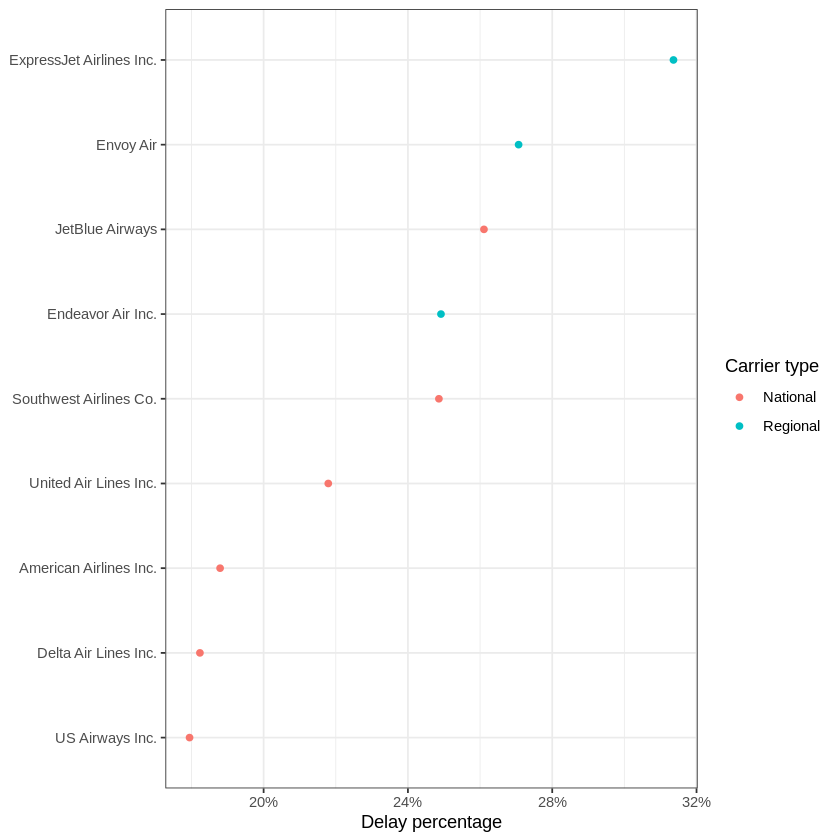

In [15]:
# Your answer here!

# START solution
ggplot(data=flight_delays,
  aes(
    x = p_delayed,
    y = fct_reorder(name, p_delayed),
    color = carrier_type
  )) +
  geom_point() +
  scale_x_continuous(name = 'Delay percentage', label=percent) +
  scale_y_discrete(name = NULL) +
  scale_color_discrete(name = 'Carrier type') +
  theme_bw()
# END solution

## Part 4: Voter intent (on Xbox!)

Finally, we'll examine candidate preferences collected on the Xbox gaming platform during the 2012 presidential election.

(It might seem like a really bad idea to run such a survey on Xbox, but later in the course we'll see how you can adjust such survey data to be more representative of likely voters.)

Run the cell below to start.

In [16]:
load(url("https://5harad.com/datasets/API201/voter_intent.Rdata"))
head(voter_intent)

date,p_obama
<date>,<dbl>
2012-09-22,0.4648760
2012-09-23,0.4882716
2012-09-24,0.4743655
2012-09-25,0.5069077
2012-09-26,0.4729378
2012-09-27,0.5107799


### Exercise

Create a time series (i.e., a line plot) that shows support of Obama over time. Ensure the axes are appropriately named, let the range of the vertical axis to go from 35% to 55%, and format the tick marks as percentages.

In this case, the `date` column is already formatted in R's internal `date` format. Since we're plotting `date` on the horizontal axis, its corresponding scale can be referenced with the `scale_x_date` command.

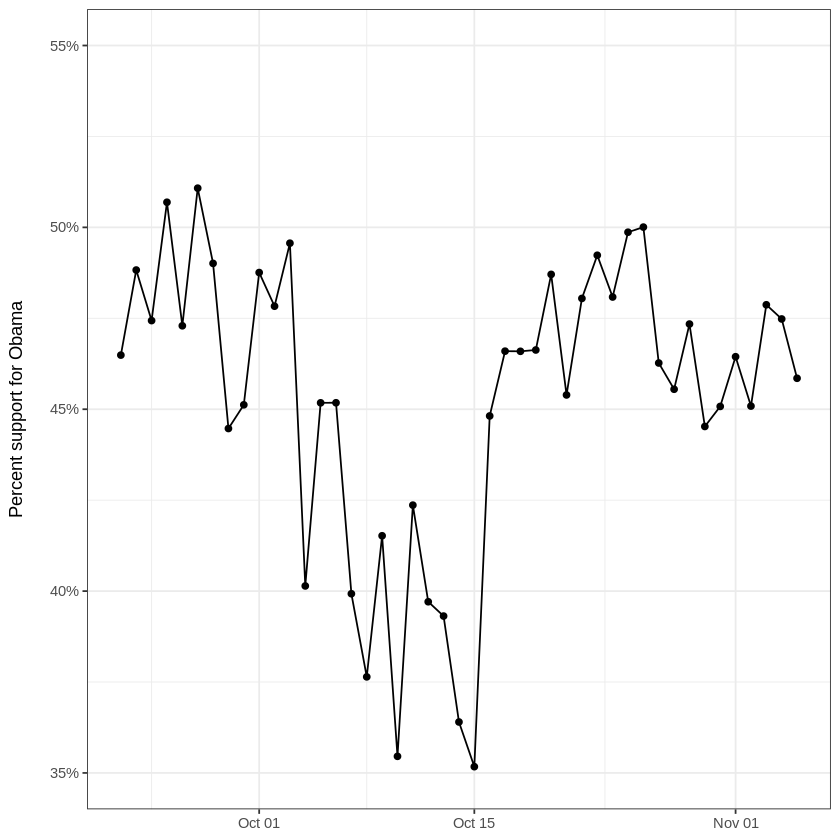

In [17]:
# Your answer here!

# START solution
ggplot(data=voter_intent, aes(x=date, y=p_obama)) +
  geom_point() +
  geom_line() +
  scale_x_date(name = NULL) +
  scale_y_continuous('Percent support for Obama\n', labels=percent, limits = c(.35, .55)) +
  theme_bw()
# END solution

In [18]:
demographic_dist

attribute,n,cat,source,p
<fct>,<dbl>,<fct>,<fct>,<dbl>
female,5682.00000,Sex,XBox,0.06822521
male,77601.00000,Sex,XBox,0.93177479
black,7481.00000,Race,XBox,0.08982626
hispanic,8055.00000,Race,XBox,0.09671842
other,5432.00000,Race,XBox,0.06522339
white,62315.00000,Race,XBox,0.74823193
18-29,54562.00000,Age,XBox,0.65513970
30-44,23028.00000,Age,XBox,0.27650301
45-64,4827.00000,Age,XBox,0.05795901


As a final exercise, we'll compare the demographic composition of the Xbox respondents to the American electorate (in the previous election, in 2008). Each row in the dataframe contains the number of Xbox respondents in various demographic groups (with `source` equal to `Xbox`), as well as the expected number of people in those groups in a large random sample of voters from the 2008 election (with `source` equal to `2008 Electorate`).

The demographic groups are organized into categories (`cat`), with percentages (`p`) computed within each category to sum to 100%. So, for example, the `p` column gives the percentage of respondents across race groups, and, separately, the percentage of respondents across education levels.

### Exercise

Create a bar plot with the demographic groups on the horizontal axis and the percentages of each group within its category on the vertical axis.

For each group, create two bars -- one for Xbox respondents and one for the 2008 electorate -- by appropriately setting the `fill` parameter in `aes`. To position the bars side-by-side (as opposed to stacked), set `position='dodge'` in `geom_col`.

Tip: You can angel the axis labels, so they don't overlap, with this command:
> theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1))

But note that this command should come _after_ theme_bw(), otherwise it will be overridden by the general plot style.

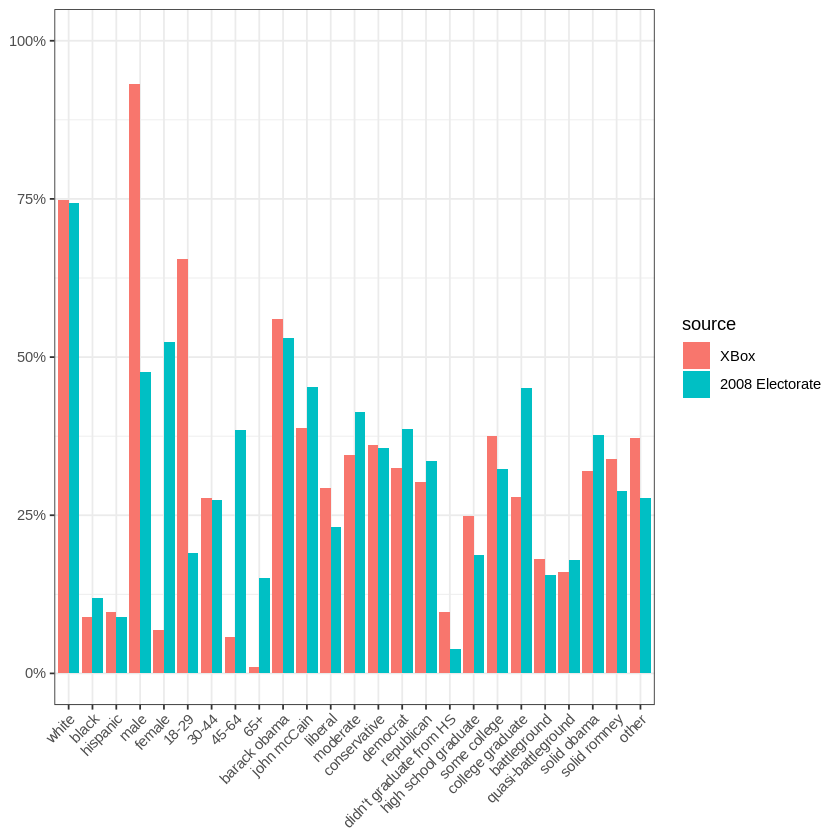

In [19]:
# Your answer here!

# START solution
ggplot(demographic_dist, aes(x=attribute, y=p, fill=source)) +
  geom_col(position='dodge') +
  scale_y_continuous(name = NULL, limits=c(0,1), labels=percent) +
  scale_x_discrete(name = NULL) +
  theme_bw() +
  theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1))
# END solution

### Exercise

As a last step, we'll separate the demographic groups by category. We can do with `facet_grid`. The general syntax is `facet_grid(~variable)`, where `variable` is the name of the column to facet the plot by. To make the plot more readable, you can additionally add the parameters `scales="free_x"` and `space="free"` to `facet_grid`; these parameters ensure that the facets are appropriately sized, regardless of the number of groups in each category.

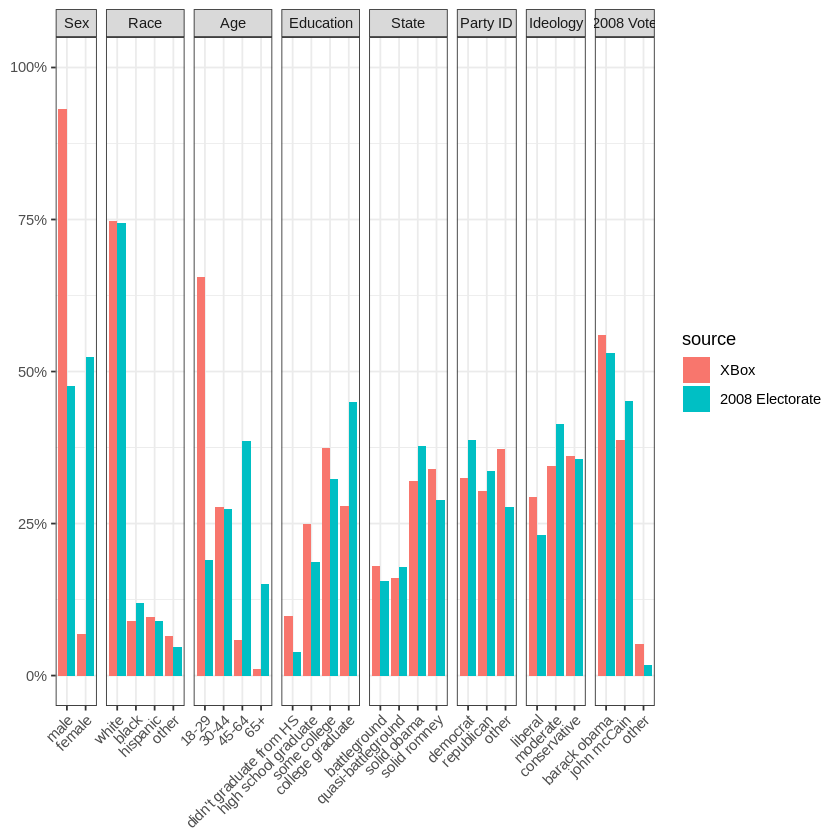

In [24]:
# Your answer here!

# START solution
ggplot(demographic_dist, aes(x=attribute, y=p, fill=source)) +
  geom_col(position='dodge') +
  facet_grid(~cat, scales="free_x", space="free") +
  scale_y_continuous(name = NULL, limits=c(0,1), labels=percent) +
  scale_x_discrete(name = NULL) +
  theme_bw() +
  theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1))
# END solution